In [1]:
import pandas as pd
import numpy as np
import re

import json
import datetime
from dateutil import parser

In [7]:
data_file = '/Users/maboals/Downloads/EBA.txt'

In [8]:
fp = open(data_file, 'r')

In [9]:
big_df = pd.DataFrame()

for i in range(20) :
    line = fp.readline()
    js = json.loads(line)
    data = js['data']
    dt_time = pd.to_datetime([parser.isoparse(re.split('Z-', x[0])[0]) for x in data], utc=True)
    vals = [x[1] if x[1] != None else 0 for x  in data]
    mean_val = np.mean(vals)
    vals = [x if  x < 4*mean_val else mean_val for x in vals]
    print(i)
    df = pd.DataFrame(vals, index=dt_time, columns=[js['series_id']])
    big_df = pd.concat([big_df, df], axis=1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [10]:
js['data'][:10]

[['20200304T03Z', 41107],
 ['20200304T02Z', 41653],
 ['20200304T01Z', 41187],
 ['20200304T00Z', 40171],
 ['20200303T23Z', 40018],
 ['20200303T22Z', 40074],
 ['20200303T21Z', 40409],
 ['20200303T20Z', 40484],
 ['20200303T19Z', 40260],
 ['20200303T18Z', 39866]]

In [11]:
big_df.dropna(inplace=True)
big_df.head(20)

,EBA.LDWP-ALL.D.H,EBA.LGEE-ALL.D.H,EBA.MIDA-ALL.D.H,EBA.MIDW-ALL.D.H,EBA.SRP-ALL.D.HL,EBA.FMPP-ALL.D.HL,EBA.PACW-ALL.D.H,EBA.PSCO-ALL.D.H,EBA.PSEI-ALL.D.H,EBA.SCEG-ALL.D.H,EBA.SOCO-ALL.D.H,EBA.AZPS-ALL.D.H,EBA.BANC-ALL.D.H,EBA.BPAT-ALL.D.H,EBA.CHPD-ALL.D.H,EBA.CENT-ALL.D.H,EBA.NE-ALL.D.H,EBA.NY-ALL.D.H,EBA.TEN-ALL.D.H,EBA.TEX-ALL.D.H
2015-07-01 08:00:00+00:00,3298.0,3173.0,74931,68163.0,4103.0,1756.0,1749.0,4618.0,3066.0,2292,23383.0,4478.0,-2010.960562,0.0,434.0,26384.0,12385,15283,14896.0,33638.0
2015-07-01 09:00:00+00:00,3045.0,3211.0,74368,67309.0,3897.0,1737.0,1597.0,4427.0,2865.0,2265,23184.0,4227.0,-2010.960562,0.0,422.0,25663.0,12387,15304,14663.0,32798.0
2015-07-01 10:00:00+00:00,2892.0,3284.0,77156,68456.0,3694.0,1801.0,1481.0,4344.0,2735.0,2384,23680.0,4016.0,-2010.960562,0.0,416.0,25481.0,12931,15874,14820.0,32805.0
2015-07-01 11:00:00+00:00,2787.0,3516.0,81032,71503.0,3590.0,1905.0,1419.0,4374.0,2710.0,2494,24079.0,3879.0,-2010.960562,0.0,413.0,26061.0,13655,17161,15344.0,34121.0
2015-07-01 12:00:00+00:00,2790.0,3727.0,86061,75490.0,3546.0,2017.0,1381.0,4505.0,2752.0,2579,24717.0,3821.0,-2010.960562,0.0,413.0,26938.0,14740,18690,16077.0,35894.0
2015-07-01 13:00:00+00:00,2899.0,3986.0,89560,79965.0,3534.0,2222.0,1486.0,4811.0,2911.0,2725,25694.0,3823.0,-2010.960562,0.0,415.0,28180.0,15669,19956,16919.0,37403.0
2015-07-01 14:00:00+00:00,3097.0,4185.0,93093,83779.0,3634.0,2470.0,1686.0,5224.0,2975.0,2876,27309.0,3960.0,-2010.960562,0.0,430.0,29562.0,16275,20971,17683.0,39964.0
2015-07-01 15:00:00+00:00,3403.0,4382.0,97580,87101.0,3810.0,2712.0,1917.0,5640.0,3198.0,3053,29195.0,4169.0,-2010.960562,0.0,446.0,31254.0,16801,21849,18527.0,43192.0
2015-07-01 16:00:00+00:00,3732.0,4556.0,101457,90636.0,4053.0,2897.0,2090.0,6088.0,3366.0,3255,31046.0,4377.0,-2010.960562,0.0,458.0,33085.0,17112,22471,19342.0,46593.0
2015-07-01 17:00:00+00:00,3964.0,4708.0,104918,93663.0,4330.0,3021.0,2245.0,6456.0,3658.0,3444,32888.0,4597.0,-2010.960562,0.0,444.0,35077.0,17218,22809,19844.0,48829.0


In [5]:
pairs1 = js1['data']
pairs2 = js2['data']

In [6]:
times1 = [parser.isoparse(x[0].split('Z')[0]) for x in pairs1]
values1 = [x[1] for x in pairs1]
times2 = [parser.isoparse(x[0].split('Z')[0]) for x in pairs2]
values2 = [x[1] for x in pairs2]

In [7]:
srs1 = pd.Series(times1, values1)
srs2 = pd.Series(times2, values2)

In [8]:
df = pd.DataFrame(values1, index=times1)

In [9]:
df.head()

,0
2020-03-04 03:00:00,3332.0
2020-03-04 02:00:00,3273.0
2020-03-04 01:00:00,3224.0
2020-03-04 00:00:00,3209.0
2020-03-03 23:00:00,3190.0


In [10]:
df.columns = [js1['series_id']]

In [11]:
df.shape

(40746, 1)

In [12]:
df[js2['series_id']] = values2[:df.shape[0]]

In [13]:
df.head()

,EBA.LDWP-ALL.D.H,EBA.LGEE-ALL.D.H
2020-03-04 03:00:00,3332.0,3793.0
2020-03-04 02:00:00,3273.0,3901.0
2020-03-04 01:00:00,3224.0,3883.0
2020-03-04 00:00:00,3209.0,3680.0
2020-03-03 23:00:00,3190.0,3591.0


In [33]:
srs = pd.Series([js['series_id'], js['name'], js['units'], js['f'], js['description'], js['start'], js['end'], js['last_updated'], \
    js['geoset_id']])

In [34]:
line = fp2.readline()

In [35]:
js = json.loads(line)
print(js['name'], ':', js['geoset_id'])
print(js.keys())

Demand for Louisville Gas and Electric Company and Kentucky Utilities Company (LGEE), hourly - UTC time : EBA.D.H
dict_keys(['series_id', 'name', 'units', 'f', 'description', 'start', 'end', 'last_updated', 'geoset_id', 'data'])


In [36]:
srs2 = pd.Series([js['series_id'], js['name'], js['units'], js['f'], js['description'], js['start'], js['end'], js['last_updated'], \
    js['geoset_id']])

In [37]:
df = pd.DataFrame([srs, srs2])

In [40]:
df.columns = ['series_id', 'name', 'units', 'f', 'description', 'start', 'end', 'last_update', 'geoset_id']
df

,series_id,name,units,f,description,start,end,last_update,geoset_id
0,EBA.LDWP-ALL.D.H,Demand for Los Angeles Department of Water and...,megawatthours,H,Timestamps follow the ISO8601 standard (https:...,20150701T08Z,20200304T03Z,2020-03-03T22:45:18-05:00,EBA.D.H
1,EBA.LGEE-ALL.D.H,Demand for Louisville Gas and Electric Company...,megawatthours,H,Timestamps follow the ISO8601 standard (https:...,20150701T06Z,20200304T03Z,2020-03-03T22:45:18-05:00,EBA.D.H


In [7]:
import matplotlib.pyplot as plt

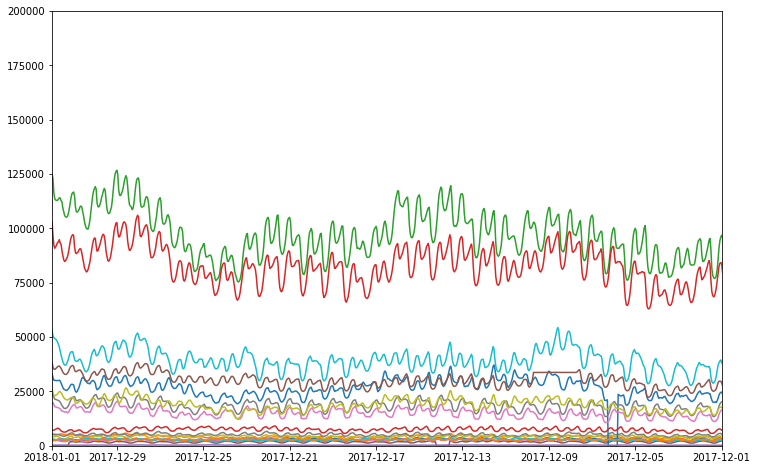

In [11]:
fig = plt.figure(figsize=[12,8])

plt.xlim(datetime.datetime(2018, 1,1), datetime.datetime(2017,12,1))
plt.ylim(0, 200000)

plt.plot(big_df)